<a href="https://colab.research.google.com/github/naman8827/mnist_cnn/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import numpy as np
from google.colab import files
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from keras import optimizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_train=pd.read_csv('/content/drive/My Drive/mnist_train.csv')
df_test=pd.read_csv('/content/drive/My Drive/mnist_test.csv')

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
output_label=df_train['label']

In [6]:
output_label.shape

(42000,)

In [7]:
from numpy import array
from numpy import argmax
output_label=df_train['label']
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(output_label)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(42000, 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [8]:
onehot_encoded.shape

(42000, 10)

In [9]:
train=pd.DataFrame()
train=df_train

In [10]:
train=train.drop(['label'],axis=1)

In [34]:
train['pixel0'].size

42000

In [45]:
train=np.array(train)

In [48]:
train = train.reshape(train.shape[0], 28,28,1)

In [50]:
train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [57]:
from keras import optimizers
from keras import regularizers

from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32 , kernel_size = (5,5) , strides = (1,1) , activation = 'relu' , padding = 'same' , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32 , kernel_size = (5,5) , strides = (1,1) , activation = 'relu' , padding = 'same' ))
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
batch = 128
hm_epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss= 'categorical_crossentropy' ,
              optimizer=opt,
              metrics=["accuracy"])
history = model.fit(train , onehot_encoded , epochs = hm_epochs , batch_size = batch , validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 108s 3ms/step - loss: 4.1854 - accuracy: 0.9282 - val_loss: 1.3031 - val_accuracy: 0.9512
Epoch 2/10
33600/33600 [==============================] - 107s 3ms/step - loss: 0.5305 - accuracy: 0.9765 - val_loss: 0.5091 - val_accuracy: 0.9779
Epoch 3/10
33600/33600 [==============================] - 108s 3ms/step - loss: 0.2822 - accuracy: 0.9846 - val_loss: 0.4808 - val_accuracy: 0.9783
Epoch 4/10
33600/33600 [==============================] - 108s 3ms/step - loss: 0.1647 - accuracy: 0.9884 - val_loss: 0.4023 - val_accuracy: 0.9773
Epoch 5/10
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0820 - accuracy: 0.9925 - val_loss: 0.1966 - val_accuracy: 0.9844
Epoch 6/10
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0582 - accuracy: 0.9934 - val_loss: 0.1923 - val_accuracy: 0.9846
Epoch 7/10
33600/33600 [==============================] - 108s 

In [58]:
df_test=np.array(df_test)
df_test =df_test.reshape(df_test.shape[0], 28,28,1)

In [59]:
model.predict_classes(df_test)

array([2, 0, 9, ..., 3, 9, 2])

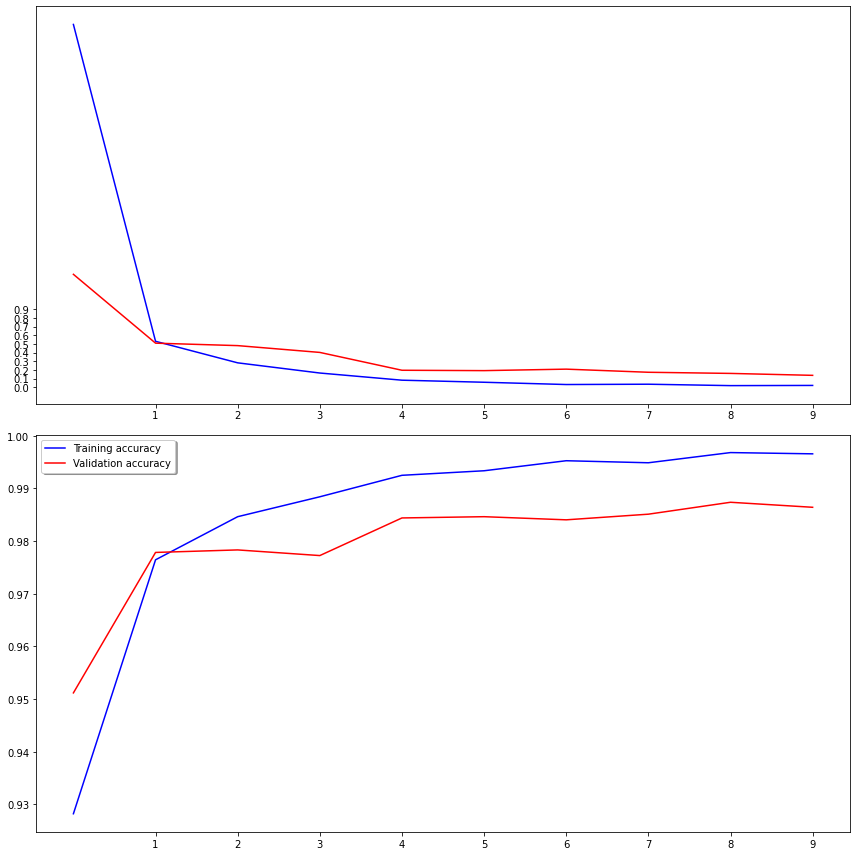

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, hm_epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, hm_epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()